<h1 style="color:green">Important Libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:green">Reading CSV file</h1>

In [3]:
df = pd.read_csv('L://jupytar//owid-covid-data.csv')

In [4]:
s = 'India'

<h1 style="color:green">Cleaning and organising dataset</h1>

In [5]:
country = df[df['location']== s][['date' , 'new_cases']]

In [6]:
country.set_index('date' , inplace=True)
country.drop(['2021-01-08','2020-12-31','2021-01-02','2021-01-09'] , axis = 0 , inplace= True)

<h1 style="color:green">Manually rolling for <i><b>k</b></i> rows</h1> 

In [7]:
pred = []
std = []
k = 1
for i in range(len(country)-k):
    pred.append(np.mean(country.iloc[i:i+k]['new_cases']))
    std.append(np.std(country.iloc[i:i+k]['new_cases']))

In [8]:
country = country.iloc[k:]

In [9]:
country['Moving Average'] = pred
country['Standard Deviation'] = std

<AxesSubplot:xlabel='date'>

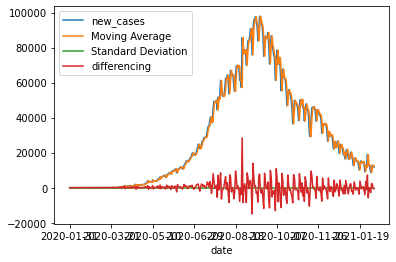

In [10]:
country['differencing'] = country['new_cases'] - country['Moving Average']
country.plot()

In [11]:
smooth = country.drop(['new_cases' , 'Moving Average' , 'Standard Deviation'] , axis = 1)
#smooth['differencing'] = np.sqrt(smooth['differencing'])

<AxesSubplot:xlabel='date'>

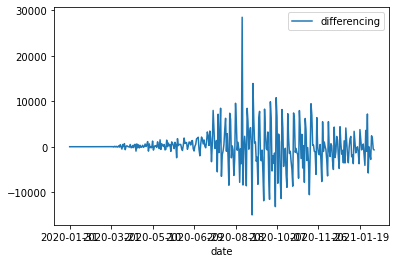

In [12]:
smooth.plot()

<h1 style="color:green">tranforming dataset to make it stationary</h1>

In [13]:
smooth.dropna(inplace=True)
part = min(smooth['differencing'])
smooth['differencing'] = smooth['differencing'].apply(lambda x: x - part +1)
smooth['differencing'] = np.log(smooth['differencing'])

In [14]:
smooth

,differencing
date,
2020-01-31,9.615339
2020-02-01,9.615405
2020-02-02,9.615472
2020-02-03,9.615405
2020-02-04,9.615339
...,...
2021-02-01,9.408617
2021-02-02,9.764111
2021-02-03,9.732343


In [15]:
gfg = smooth['differencing'].describe()
#smooth['differencing'] = smooth['differencing'].apply(lambda x: x + part - 1)

<h1 style="color:green">eleminated all values not lying in Upper and lower limit (mean (+/-) 3* stddev)</h1>

In [16]:
ul = gfg.loc['mean'] + 3*gfg.loc['std']
ll = gfg.loc['mean'] - 3*gfg.loc['std']
smooth = smooth[smooth['differencing'] >= ll]
smooth = smooth[smooth['differencing'] <= ul]

<AxesSubplot:xlabel='date'>

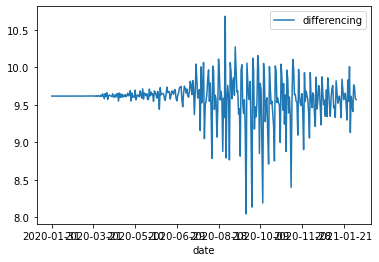

In [17]:
smooth.dropna(inplace=True)
#smooth = smooth[smooth['differencing'] > -14988]
smooth.plot()

In [18]:
smooth

,differencing
date,
2020-01-31,9.615339
2020-02-01,9.615405
2020-02-02,9.615472
2020-02-03,9.615405
2020-02-04,9.615339
...,...
2021-02-01,9.408617
2021-02-02,9.764111
2021-02-03,9.732343


<h1 style="color:green">Plotted ACF and PACF plots to get intuition of stationarity</h1>

In [19]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

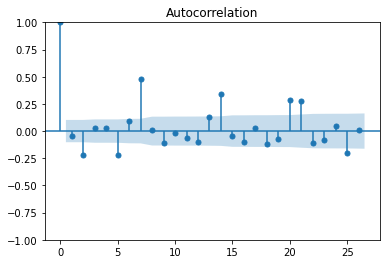

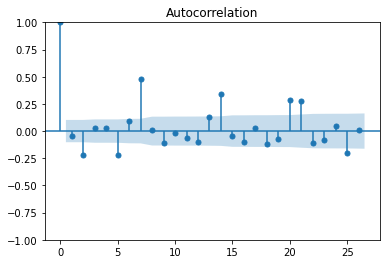

In [20]:
plot_acf(smooth)

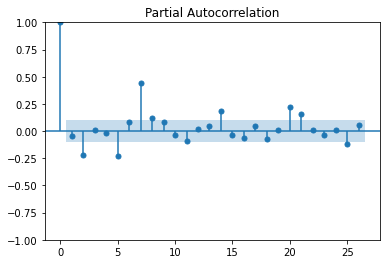

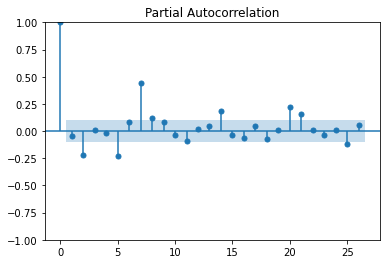

In [21]:
plot_pacf(smooth)

In [22]:
lg = smooth.shape[0]

<h1 style="color:green">Split training and testing dataset</h1>

In [23]:
breakpoint = (3*lg)//4
train = smooth.iloc[0:breakpoint]
test = country.iloc[breakpoint:]

In [24]:
country.iloc[0:breakpoint]
train

,differencing
date,
2020-01-31,9.615339
2020-02-01,9.615405
2020-02-02,9.615472
2020-02-03,9.615405
2020-02-04,9.615339
...,...
2020-10-28,9.951420
2020-10-29,9.529594
2020-10-30,9.589735


<h1 style="color:green">Execution of ARIMA Model</h1>

In [25]:
from statsmodels.tsa.arima.model import ARIMA

<h3 style="color:violet"><pre>p = 6
    q = 7
    i = 0
    </pre></h3>

In [26]:
model = ARIMA(list(train['differencing']) , order = (6,0,7))
model_fit = model.fit()
model_fit.aic

C:\Users\Arpit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-5.461839196869647

In [27]:
length = test.shape[0]

In [28]:
test.shape

(94, 4)

In [29]:
pre = model_fit.forecast(steps = length)
pre

array([9.21741657, 9.80833583, 9.88054369, 9.64264732, 9.53843332,
       9.3829977 , 9.22454517, 9.4745295 , 9.85403999, 9.83739059,
       9.63846968, 9.51048619, 9.33002237, 9.27714968, 9.58739783,
       9.87071886, 9.80500461, 9.62327459, 9.46779283, 9.29952806,
       9.35071328, 9.67417164, 9.8733996 , 9.7752362 , 9.59723154,
       9.41933648, 9.29639337, 9.43030775, 9.74012762, 9.86546237,
       9.74615187, 9.55880366, 9.37785815, 9.31493225, 9.51037982,
       9.78627053, 9.8522279 , 9.71173125, 9.51459625, 9.34761021,
       9.35224208, 9.58376891, 9.81807562, 9.83231837, 9.67232264,
       9.4681865 , 9.33357438, 9.40105403, 9.64939785, 9.83653466,
       9.80689497, 9.62692701, 9.42621135, 9.33494668, 9.45760853,
       9.7046919 , 9.84452324, 9.7743567 , 9.57876826, 9.39169901,
       9.3516268 , 9.51655738, 9.75018277, 9.84190591, 9.7358809 ,
       9.52982255, 9.36838289, 9.38045757, 9.57535903, 9.78484381,
       9.82999201, 9.6916914 , 9.48399968, 9.35700762, 9.41934

<h1 style="color:green">Detransforming the values which were tranformed earlier to reduce non-stationarity</h1>

In [30]:
new_cases = []
init = 45213
for ele in pre:
    init += (part + np.exp(ele)  -1)
    new_cases.append(init)

In [31]:
new_cases

[40290.01297052544,
 43480.7124375151,
 48033.059438243065,
 48447.13932298236,
 47336.319460469036,
 44226.907265705566,
 39375.96888124943,
 37405.71371265107,
 41446.81498863865,
 45173.61697730903,
 45523.46179909349,
 44030.01834718803,
 40307.402008604106,
 36004.317918711706,
 35590.19866306329,
 39951.446399684086,
 43081.669453307695,
 43200.12552557777,
 41142.42859079205,
 37081.28696443303,
 33594.31516464203,
 34501.86153699644,
 38915.06522505365,
 41513.710285298366,
 41243.67262649172,
 38574.07462771005,
 34478.71553839543,
 31945.076298058506,
 33936.785327828606,
 38196.559276284184,
 40290.90315134678,
 39465.78840577213,
 36295.4515348693,
 32404.025539441915,
 30909.146137622294,
 33702.98929500279,
 37709.62842123564,
 39225.78882202502,
 37787.94770306204,
 34265.32421874931,
 30795.957864728727,
 30329.02534632176,
 33697.70526880681,
 37329.7916128643,
 38207.96317828502,
 36155.35985147787,
 32472.85068109807,
 29579.97966931308,
 30098.424118809475,
 33809.2

In [32]:
pred = pd.DataFrame(new_cases , index=test.index)

In [33]:
final = pd.merge(pred , test , how = 'inner' , on = 'date')

In [34]:
final.rename(columns={0:'Predicted'} , inplace=True)
final

,Predicted,new_cases,Moving Average,Standard Deviation,differencing
date,,,,,
2020-10-31,40290.012971,46963.0,48268.0,0.0,-1305.0
2020-11-01,43480.712438,45231.0,46963.0,0.0,-1732.0
2020-11-02,48033.059438,38310.0,45231.0,0.0,-6921.0
2020-11-03,48447.139323,46253.0,38310.0,0.0,7943.0
2020-11-04,47336.319460,50210.0,46253.0,0.0,3957.0
...,...,...,...,...,...
2021-02-01,27714.934928,8635.0,11436.0,0.0,-2801.0
2021-02-02,31225.987032,11039.0,8635.0,0.0,2404.0
2021-02-03,33260.109165,12899.0,11039.0,0.0,1860.0


<h1 style="color:green">Plotted graph for original and predicted data</h1>

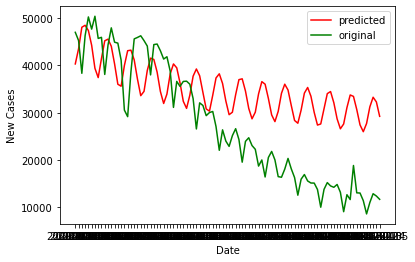

In [35]:
plt.plot(final.index, final['Predicted'] , color = 'red', label='predicted')
plt.plot(final.index, final['new_cases'] , color = 'green', label='original')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()